<center>
<table>
  <tr>
    <td><img src="https://portal.nccs.nasa.gov/datashare/astg/training/python/logos/nasa-logo.svg" width="100"/> </td>
     <td><img src="https://portal.nccs.nasa.gov/datashare/astg/training/python/logos/ASTG_logo.png?raw=true" width="80"/> </td>
     <td> <img src="https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png" width="130"/> </td>
    </tr>
</table>
</center>

        
<center>
<h2><font color= "blue" size="+3">PyCon 2024 Tutorial</font></h2>
</center>

---

<center>
    <h3>Python Workflows to Extract and Plot Satellite Data Products along Tracks</h3>
    <h2><font color="red" size="+3">Tracking the Movement of the Aura Satellite</font></h2>
</center>

----
[Jules Kouatchou](mailto:Jules.Kouatchou@nasa.gov) • [Bruce Van Aartsen](mailto:bruce.vanaartsen@nasa.gov)
-
----

# <font color="red"> Objectives</font>

We want to use a timeseries collections of data files from the Aura satellite to:
- Track the movement of the satellite
- Plot along the path values of fields.


# <font color="red"> NASA Earth Observing System (EOS)</font>

![fig_eos](https://eospso.nasa.gov/sites/default/files/u15/fleet-swoosh-082922_Sept27.png)

### <font color="blue">EOS</font>

- Was conceived in the 1980s and began to take shape in the early 1990s. 
- Is comprised of a series of coordinated polar-orbiting satellites designed to monitor and understand key components of the climate system and their interactions through long-term global observations.
- The EOS missions focus on the following climate science areas:
  - Radiation, clouds, water vapor, and precipitation,
  - The oceans,
  - Greenhouse gases; land-surface hydrology and ecosystem processes,
  - Glaciers, sea ice, and ice sheets,
  - Ozone and stratospheric chemistry, and
  - Natural and anthropogenic aerosols.
- The primary goal is to determine the extent, causes, and regional consequences of global climate change. 
- Some of the satellites included in EOS are:
   - [Aqua](https://eospso.nasa.gov/missions/aqua): Collects data on the Earth's water cycle, including evaporation from the oceans, water vapor in the atmosphere, clouds,precipitation, soil moisture, sea ice, land ice, and snow cover on the land and ice.
   - [Aura](https://eospso.nasa.gov/missions/aura): Is meant to study the atmosphere's chemistry and dynamics. Its measurements help investigate questions about ozone trends, air-quality changes, and their linkage to climate change. 
   - [Terra](https://eospso.nasa.gov/missions/terra): Explores the connections between Earth’s atmosphere, land, snow and ice, ocean, and energy balance to understand Earth’s climate and climate change and to map the impact of human activity and natural disasters on communities and ecosystems
   - [Landsat 7](https://eospso.nasa.gov/missions/landsat-7): Gathers remotely sensed images of land surface and coastal regions for global change research, regional environmental change
studies, national security uses, and other civil and commercial purposes.

# <font color="red">Ozone Monitoring Instrument (OMI)</font>

### <font color="blue">Overview</font>
- [Ozone Monitoring Instrument (OMI)](https://aura.gsfc.nasa.gov/omi.html) is key instrument aboard the Aura satellite.
  - The Aura satellite orbits at an altitude of 705 km in a sun-synchronous polar orbit with an exact 16-day repeat cycle.
  - OMI is a nadir-viewing wide-field-imaging spectrometer, giving daily global coverage.
  - OMI measures the key air quality components such as nitrogen dioxide (NO$_2$), sulfur dioxide (SO$_2$), bromine oxide (BrO), OClO, and aerosol characteristics.
  - OMI provides mapping of pollution products from an urban to super-regional scale.
- The US Environmental Protection Agency (EPA) has designated the atmospheric constituents (such as $O_3$, $NO_2$, $SO_2$) measured by OMI as posing serious threats to human health and agricultural productivity. These measurements are made at near urban scale resolution and track industrial pollution and biomass burning.

### <font color="blue">OMI Swath</font>
- One OMI swath is measured every two seconds.
- Due to the optical characteristics of the instrument, adjacent swaths overlap considerably in their ground coverage.
- The width of a swath ensures that swaths from adjacent consecutive orbits are nearly contiguous at the equator and have some overlap at mid- to high-latitudes.
-  In a single orbit, OMI measures approximately 1650 swaths from terminator to terminator.
-  In the standard global measurement mode, OMI observes __60__ ground pixels (13 km x 24 km at nadir) across the swath (13 km x 48 km at nadir).

#### Satellite acquiring image at nadir

![fig_sat](https://images.ctfassets.net/nzn0tepgtyr1/6QMhOl5l5tIrQobVDloRuh/8ff2446a3e312452c6671e8792e0710f/image19_1.png)
Image Source: [Antonio Almeida, How to perform orthorectification: A practical guide](https://up42.com/blog/how-to-perform-orthorectification-a-practical-guide)

### <font color="blue">OMI Data</font>

The OMI data are available in the following four levels: 

- __Level 0__ products are raw sensor counts. Level 0 data are packaged into two-hour "chunks" of observations in the life of the spacecraft  irrespective of orbital boundaries. They contain orbital swath data.
- __Level 1B__ processing takes Level 0 data and calibrates, geo-locates and packages the data into orbits. They contain orbital swath data.
- <font color="green">__Level 2__ products contain orbital swath data.</font>
- __Level 3__ products contain global data that are composited over time (daily or monthly) or over space for small equal angle (latitude longitude) grids covering the whole globe.


Here we focus on the [Nitrogen Dioxide ($NO_2$) Total and Tropospheric Column](https://disc.gsfc.nasa.gov/datasets/OMNO2_003/summary) 1-orbit L2 Swath.

- Although only a small percentage  of $NO_2$ is formed naturally by lightning, volcanoes, water, and bacterial activity on soil and plants, it can also be emitted through the burning of biomass.
- In urban areas, $NO_2$ originates mostly from the combustion of fossil fuels from a large variety of activities, such as electricity generation, manufacturing industries, food processing, transportation, among others.
- $NO_2$ is an important chemical species in both the stratosphere (where it plays a key role in ozone chemistry) and in the troposphere (where it is a precursor to ozone production).
- In the troposphere, it has a lifetime of several hours, is an important contributor to air pollution and can adversely affect human health.
   - Human exposure to elevated $NO_2$ concentrations is associated with a range of adverse outcomes such as respiratory infections, increases in asthma incidence, lung cancer and overall mortality. 
   - The effect is considerable in large urban centers since the people are exposed to this pollutant for long periods of time.
- The OMI $NO_2$ data products are infered from the measurements, with the minimum possible dependence on model simulations.
   - They have been used widely for a large variety of purposes, especially for air quality monitoring.
   - Their long-time series makes it valuable when the evolution of this important pollutant needs to be tracked throughout a longer period of time.



### <font color="blue">How to Obtain OMI Data</font>

- For this tutorial, we have already obtained data files for July 9, 2023.
- In case you want to obtain data on your own, you can visit NASA's EARTH<b>DATA</b> website.
Existing users can [login here](https://urs.earthdata.nasa.gov/home). New users must click the REGISTER button.
<br>

![fig_login](https://ghrc.nsstc.nasa.gov/home/sites/default/files/fh4553/LoginPage.png)


- After logging in, click the EARTH<b>DATA</b> logo in the top left to go to the home page.
- On the home page, click on the "Data" link at the top, and then select "Earthdata Search", which will bring you to a page similar to this:
![fig_search](https://www.earthdata.nasa.gov/s3fs-public/2021-10/cmr_screenshot.png?VersionId=dCqvkMUioPt6g8FWbog8VZA25xDj_imB)

- To find the OMI collections, enter "OMI NO2" in the Search box on the top left. One of the resulting choices should show "OMI/Aura Nitrogen Dioxide (NO2) Total and - Tropospheric Column 1-orbit L2 Swath 13x24 km". 
- Click on that box to reveal the list of data "Granules" available in the collection, which will resemble this:
![fig_granules](https://nasa-openscapes.github.io/2021-Cloud-Workshop-AGU/tutorials/img/select_granules_download.png)

- You can use the filters menu at left to narrow down the times or location you are interested in. Click the "+" sign inside the box of each individual granule you'd like to download. It will turn to a "-" sign to indicate it has been selected. Then click the green Download button to get all the selected granules.

---

## Required Packages


- __Matplotlib__: for basic plots.
- __Pandas__: Manipulation and exploratory data analysis of tabular data.
- __Shapely__: For manipulation and analysis of planar geometric objects
- __GeosPandas__: Combines the capabilities of Pandas and Shapely for geospatial operations
- __MovingPandas__: Handling the movement of geospatial objects.
- __h5py__: Read HDF5 files.

----

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import datetime as dt
from pathlib import Path

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors

In [5]:
import numpy as np
import h5py
import pandas as pd
import geopandas as gpd

In [6]:
from shapely import geometry as shpgeom
from shapely import wkt as shpwkt

In [7]:
import movingpandas as mpd

In [8]:
import holoviews as hv

In [9]:
import hvplot.pandas 

In [10]:
plot_defaults = {'linewidth':5, 'capstyle':'round', 'figsize':(9,3), 'legend':True}
hv.opts.defaults(hv.opts.Overlay(active_tools=['wheel_zoom'], 
                              frame_width=500, frame_height=400))
hvplot_defaults = {'tiles':None, 'cmap':'Viridis', 'colorbar':True}

In [11]:
#mpd.show_versions()

---

---
## <font color='red'>h5py</font>
- Python interface to the HDF5 binary data format.
- Provide easy-to-use high level interface, which allows you to store huge amounts of numerical data.
- Easily manipulate that data from NumPy.
    - Use straightforward NumPy and Python metaphors, like dictionary and NumPy array syntax.
- Within h5py, HDF5 groups work like dictionaries, and datasets work like NumPy arrays.

It is important to know the structure of an HDF5 file. It can be as a container for two kinds of objects: 
1. **Datasets**:, Array-like collections of data.
2. **Groups**: Folder-like containers that hold datasets and other groups.

---

---
## <font color="red">Reading a sample data file</font>

We have a collection of data files that have timeseries observations.

--- 

In [23]:
#data_dir = "C:\Users\joshu\OneDrive\Desktop\Python projects\datasets\OMI_Data"

data_dir = 'C:/Users/joshu/OneDrive/Desktop/Python projects/datasets/OMI_Data'  # Use an absolute path
import os
if os.path.exists(data_dir):
    list_files = os.listdir(data_dir)
    print(list_files)
else:
    print("Directory does not exist.")

['OMI-Aura_L2-OMNO2_2024m0818t2309-o106889_v003-2024m0819t234949.he5', 'OMI-Aura_L2-OMNO2_2024m0819t0048-o106890_v003-2024m0820t051059.he5', 'OMI-Aura_L2-OMNO2_2024m0819t0227-o106891_v003-2024m0820t051104.he5', 'OMI-Aura_L2-OMNO2_2024m0819t0406-o106892_v003-2024m0820t051103.he5', 'OMI-Aura_L2-OMNO2_2024m0819t0544-o106893_v003-2024m0820t051100.he5']


In [21]:
print(list_files)

[]


- Each file represents a swath.
- When we do the analysis, we need to treat files individually.

In [24]:
fname = Path(data_dir) / list_files[0]

#### List all groups, datasets and their attributes: use `visititems` (mimicking `h5ls`)

In [25]:
def print_attrs(name, obj):
    """
    Given a name and the associated HDF5 object (group or dataset),
    print the name and the metadata of the object.

    Parameters
    ----------
    name : str
        Name of the object
    obj : 
        HDF5 object (can be either group or dataset)
    """
    shift = name.count('/') * '\t'
    print(f"{shift} {name}")
    if isinstance(obj, h5py.Dataset):
        print(f"{shift} \t Shape: {obj[()].shape}")
    for key, val in obj.attrs.items():
        print(f"{shift} \t {key}: {val}")
        
with h5py.File(fname, mode='r') as h5f:
    h5f.visititems(print_attrs)  

 HDFEOS
	 HDFEOS/ADDITIONAL
		 HDFEOS/ADDITIONAL/FILE_ATTRIBUTES
		 	 BackupSolarProductUsed: [0]
		 	 CloudAlbedo: [0.8]
		 	 CloudProductMissing: [0]
		 	 GranuleDay: [18]
		 	 GranuleMonth: [8]
		 	 GranuleYear: [2024]
		 	 InstrumentName: b'OMI'
		 	 IrradianceScienceQualityFlag: b'Not Investigated'
		 	 NO2ColumnAmountHistogram: [ 3957 12640 30753 30737  7876  1191   100     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]
		 	 OPF_H2OReferenceTemperature: b'220'
		 	 OPF_NO2ReferenceTemperature: b'220'
		 	 OPF_O2O2ReferenceTemperature: b'220'
		 	 OPF_O3ReferenceTemperature: b'220'
		 	 OPF_UseWavelengthFitCoefficient: b'0'
		 	 OPF_XTrackQualityFlagsErrorMask: b'0'
		 	 OPF_albedoDefault: b'0.065'
		 	 OPF_albedoLandThreshold: b'0.1'
		 	 OPF_albedoSeaIceNH: b'0.70, 0.73, 0.76, 0.80, 0.84, 0.78, 0.61, 0.61, 0.62, 0.68, 0.67, 0.71'
		 	 OPF_albedoSeaIceSH: b'0.53, 0.50, 0.44, 0.60, 0.61

### Observations
- The file has groups organized in a directory tree.
   - The file attributes are in `HDFEOS/ADDITIONAL/`.
   - The main group associated with measurements is `HDFEOS/SWATHS/ColumnAmountNO2/Data Fields`.
   - The main group associated with geolocated information is `HDFEOS/SWATHS/ColumnAmountNO2/Geolocation Fields`.
      - We have here the parameters `SpacecraftLatitude` and `SpacecraftLongitude` that correspond to subsatellite point, i.e., the point on the Earth's surface directly below the satellite.
- Each dataset has the attributes: `ScaleFactor`, `Offset`, `MissingValue` and `_FillValue`. __We will need to use these attributes to restore and mask the values of the dataset before doing analyses.__


#### How do you get a specific information from the file?

In [26]:
with h5py.File(fname, mode='r') as h5f:
    file_attr = dict(h5f['HDFEOS/ADDITIONAL/FILE_ATTRIBUTES'].attrs)
    geol_group = h5f['HDFEOS']['SWATHS']['ColumnAmountNO2']['Geolocation Fields']
    data_group = h5f['HDFEOS/SWATHS/ColumnAmountNO2/Data Fields']
    tropo = data_group['TropopausePressure'][()]
    time = geol_group['Time'][()]
    lats = geol_group['Latitude'][()]
    lons = geol_group['Longitude'][()]

In [27]:
for key in dict(file_attr):
    print(f"{key}: {file_attr[key]}")

BackupSolarProductUsed: [0]
CloudAlbedo: [0.8]
CloudProductMissing: [0]
GranuleDay: [18]
GranuleMonth: [8]
GranuleYear: [2024]
InstrumentName: b'OMI'
IrradianceScienceQualityFlag: b'Not Investigated'
NO2ColumnAmountHistogram: [ 3957 12640 30753 30737  7876  1191   100     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]
OPF_H2OReferenceTemperature: b'220'
OPF_NO2ReferenceTemperature: b'220'
OPF_O2O2ReferenceTemperature: b'220'
OPF_O3ReferenceTemperature: b'220'
OPF_UseWavelengthFitCoefficient: b'0'
OPF_XTrackQualityFlagsErrorMask: b'0'
OPF_albedoDefault: b'0.065'
OPF_albedoLandThreshold: b'0.1'
OPF_albedoSeaIceNH: b'0.70, 0.73, 0.76, 0.80, 0.84, 0.78, 0.61, 0.61, 0.62, 0.68, 0.67, 0.71'
OPF_albedoSeaIceSH: b'0.53, 0.50, 0.44, 0.60, 0.61, 0.64, 0.68, 0.76, 0.80, 0.83, 0.78, 0.66'
OPF_albedoSnow: b'0.6'
OPF_albedoWaterThreshold: b'0.1'
OPF_amfAngleUpperLimit: b'88'
OPF_automaticQualityFailed: b'

In [28]:
print(f"Shape of tropo:     {tropo.shape}")
print(f"Shape of time:      {time.shape}")
print(f"Shape of latitude:  {lats.shape}")
print(f"Shape of longitude: {lons.shape}")

Shape of tropo:     (1643, 60)
Shape of time:      (1643,)
Shape of latitude:  (1643, 60)
Shape of longitude: (1643, 60)


__1644__ corresponds to the number of time records and __60__ to number of ground pixels per observation.

In [29]:
print(time[0:3])
print(time[-4:-1])

[9.98177523e+08 9.98177525e+08 9.98177527e+08]
[9.98180802e+08 9.98180804e+08 9.98180806e+08]


In [30]:
# Ground pixel index
# 29: OMI’s smallest pixel is at the center of swath
ipxl = 29

In [31]:
print(lats[0:3, ipxl])
print(lats[-4:-1, ipxl])

[-78.311035 -78.223854 -78.13615 ]
[61.221794 61.106094 60.99029 ]


In [32]:
print(lons[0:3, ipxl])
print(lons[-4:-1, ipxl])

[-101.142975 -101.56044  -101.97182 ]
[37.452877 37.369087 37.28586 ]


---
## <font color="red">Supporting functions</font>

- Each dataset (field) in the file comes with attributes such as `ScaleFactor`, `Offset`, `MissingValue` and `_FillValue`.
- After we read a dataset (a a NumPy array), we need to restore its values:
```
   data = NaN where data == MissingValue
   data = NaN where data == _FillValue
   data = (data - Offset)*ScaleFactor
```

---

We need to write functions to extract the dataset atributes and perform the above operations.

In [33]:
def convert_dict_dtype(sample_dict):
    '''
    Converts attribute dictionary from NumPy data types 
    to general Python data types

    Parameters
    ----------
    sample_dict : dict
         A dictionary of attributes
         
    Returns
    -------
    sample_dict : dict
         A dictionary of attributes
    '''
    for key, item in sample_dict.items():
        if isinstance(item, np.ndarray):   # Converts np arrays to a list to, if applicable, an int or float
            item = list(item)
        
            if len(item) == 1:
                item = item[0]
        elif isinstance(item, np.bytes_):   # Converts np bytes to an np string to a Python string
            item = str(item.astype('str'))
        
            if item[0] == '(' or item[0] == '{':   # Converts to tuple or dict if applicable
                item = eval(item)
            # **eval() relaiability??**
            
        sample_dict[key] = item   # Updates any changes to the key value
        
    return sample_dict

In [34]:
def get_ds_attrs(ds):
    """
    Given a dataset identifier, return the dataset attribute.
       
    Parameters
    ----------
    ds : 
       dataset identifier
    
    Returns
    -------
    ds_attrs : dict
       A dictionary of the dataset attributes.
    """
    ds_attrs = dict(ds.attrs)
    ds_attrs = convert_dict_dtype(ds_attrs)
    
    return ds_attrs

In [35]:
def get_ds_attribute_value(ds_attrs, attr_name):
    '''
    Obtain the value of a specified attribute in a dataset.
    
    Parameters
    ----------
    ds_attrs : dict
         A dictionary of dataset attributes
    attr_name : str
         Attribute name    
    
    Returns
    --------
    value : float, int, str, list
         Value of the attribute. If attribute not available, None.
    '''
    for key, value in ds_attrs.items():
        if key == attr_name:
            return value 
    return None

In [36]:
def restore_data(ds):
    '''
    Restore the dataset data using the dataset attributes.

       data = NaN where data == MissingValue
       data = NaN where data == _FillValue
       data = (data - Offset)*ScaleFactor
      
    Parameters
    ----------
    ds : 
       h5py dataset identifier
    
    Returns:
    data : numpy array
       NumPy array for the restored data
    '''
    ds_attrs = get_ds_attrs(ds)
    
    fill_value = get_ds_attribute_value(ds_attrs, '_FillValue')
    missing_value = get_ds_attribute_value(ds_attrs, 'MissingValue')
    scale_factor = get_ds_attribute_value(ds_attrs, 'scale_factor')
    add_offset = get_ds_attribute_value(ds_attrs, 'add_offset')
    
    data = ds[()]#.astype('float')

    data = np.where(data != missing_value, data, np.nan)
    data = np.where(data != fill_value, data, np.nan)
    if add_offset:
        data -= add_offset
    if scale_factor:
        data *= scale_factor

    return data

---
## <font color="red">Function for reading specific data from a file</font>

We write a function that takes a file name and returns the folloing arrays:
- time records
- latitude values
- longitude values
- `ColumnAmountNO2Trop` values

The above data arrays will be used to create a timeseries dataset for the field `ColumnAmountNO2Trop`.

---

In [37]:
def get_arrays(fname, ipxl):
    with h5py.File(fname, 'r') as fid:
        geol_grp = fid['HDFEOS']['SWATHS']['ColumnAmountNO2']['Geolocation Fields']
        data_grp = fid['HDFEOS']['SWATHS']['ColumnAmountNO2']['Data Fields']
        NO2 = restore_data(data_grp['ColumnAmountNO2Trop'])[:,ipxl]
        time = geol_grp['Time'][()]
        lats = geol_grp['Latitude'][()][:,ipxl]
        lons = geol_grp['Longitude'][()][:,ipxl]
    return NO2, time, lats, lons

---

## <font color="red">Create the Pandas DataFrame</font>

- We read all the files to get in each of them the time, laitude, longitude and NO2 arrays.
- The gathered data are stacked in NumPy arrays.
- Since each file represents a swath, we will assign an index to distinguish data from each file. A addition NumPy arrays is used to store the indices.

---

In [38]:
num_files = len(list_files)
ipxl = 2
first_iter = True
for i in range(num_files):
    fname = Path(data_dir) / list_files[i]
    print(f"Reading: {fname}")
    X, Y, Z, W = get_arrays(fname, ipxl)
    traj = np.full_like(Y, i+1, dtype=int) # Index to distinguish files.
    if first_iter:
        first_iter = False
        NO2, time, lats, lons = X, Y, Z, W
        traj_id = traj
    else:
        NO2 = np.concatenate((NO2, X), axis=0)
        time = np.concatenate((time, Y), axis=0)
        lats = np.concatenate((lats, Z), axis=0)
        lons = np.concatenate((lons, W), axis=0)
        traj_id = np.concatenate((traj_id, traj), axis=0)

X, Y, Z, W, traj = None, None, None, None, None

Reading: C:\Users\joshu\OneDrive\Desktop\Python projects\datasets\OMI_Data\OMI-Aura_L2-OMNO2_2024m0818t2309-o106889_v003-2024m0819t234949.he5
Reading: C:\Users\joshu\OneDrive\Desktop\Python projects\datasets\OMI_Data\OMI-Aura_L2-OMNO2_2024m0819t0048-o106890_v003-2024m0820t051059.he5
Reading: C:\Users\joshu\OneDrive\Desktop\Python projects\datasets\OMI_Data\OMI-Aura_L2-OMNO2_2024m0819t0227-o106891_v003-2024m0820t051104.he5
Reading: C:\Users\joshu\OneDrive\Desktop\Python projects\datasets\OMI_Data\OMI-Aura_L2-OMNO2_2024m0819t0406-o106892_v003-2024m0820t051103.he5
Reading: C:\Users\joshu\OneDrive\Desktop\Python projects\datasets\OMI_Data\OMI-Aura_L2-OMNO2_2024m0819t0544-o106893_v003-2024m0820t051100.he5


Perform verifications:

In [39]:
NO2.shape

(8218,)

In [40]:
traj_id.shape

(8218,)

Convert the time (GPS unit) to a datetime object:

In [41]:
Times = np.zeros_like(time, object)
gps_epoch = dt.datetime(1980, 1, 6)
for j, t in enumerate(time):
    Times[j] = (gps_epoch + dt.timedelta(seconds=time[j] - (35 - 19))).strftime("%Y-%m-%d %H:%M:%S.%f")

In [42]:
Times[0:3]

array(['2011-08-23 23:31:46.945493', '2011-08-23 23:31:48.945875',
       '2011-08-23 23:31:50.946256'], dtype=object)

Create a Pandas DataFrame:

In [43]:
field_name = "NO2TropData"

df_omi = pd.DataFrame(
    {
        "latitude": lats, 
        "longitude": lons, 
        field_name: NO2, 
        "t": Times, 
        "traj_id": traj_id
    }
)

df_omi

,latitude,longitude,NO2TropData,t,traj_id
0,-82.092682,-158.089111,NaN,2011-08-23 23:31:46.945493,1
1,-81.976830,-157.912430,NaN,2011-08-23 23:31:48.945875,1
2,-81.860954,-157.741867,NaN,2011-08-23 23:31:50.946256,1
3,-81.744980,-157.576187,NaN,2011-08-23 23:31:52.946607,1
4,-81.628937,-157.416214,NaN,2011-08-23 23:31:54.947019,1
...,...,...,...,...,...
8213,57.847073,-43.529121,NaN,2011-08-24 07:01:26.060179,5
8214,57.746780,-43.659653,NaN,2011-08-24 07:01:28.060560,5
8215,57.646362,-43.789459,NaN,2011-08-24 07:01:30.060926,5
8216,57.545757,-43.918568,NaN,2011-08-24 07:01:32.061308,5


Get information on the columns:

In [44]:
df_omi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8218 entries, 0 to 8217
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     8218 non-null   float32
 1   longitude    8218 non-null   float32
 2   NO2TropData  7433 non-null   float32
 3   t            8218 non-null   object 
 4   traj_id      8218 non-null   int32  
dtypes: float32(3), int32(1), object(1)
memory usage: 192.7+ KB


We may need to have basic statistics:

In [45]:
df_omi.describe()

,latitude,longitude,NO2TropData,traj_id
count,8218.000000,8218.000000,7.433000e+03,8218.000000
mean,9.997389,56.903328,3.301867e+14,3.000365
std,49.238483,117.250130,9.951311e+14,1.414257
min,-82.231697,-179.996109,-6.531070e+15,1.000000
25%,-33.348088,17.120201,-2.453068e+14,2.000000
50%,15.759756,105.862755,2.162789e+14,3.000000
75%,59.435495,137.859344,7.427221e+14,4.000000
max,72.079681,179.985672,1.113327e+16,5.000000


How many individual `traj_id` do we have?

In [46]:
print(f"Values of traj_id: \n\t {df_omi['traj_id'].unique()}")

Values of traj_id: 
	 [1 2 3 4 5]


Do we need to shift longitude from [-180,180] to [0,360]?

In [47]:
#df_omi['longitude'] = df_omi['longitude']%360

---
## <font color="red">Create the MovingPandas trajectories</font>

- Because we deal with several swaths, each of them is seen as a trajectory.
- The MovingPandas function `TrajectoryCollection` is used to identify each swath.

The general syntax for calling the function is:
```
TrajectoryCollection(data,
                     traj_id_col=None,
                     obj_id_col=None,
                     t=None, x=None, y=None,
                     crs='epsg:4326',
                     min_length=0, min_duration=None)
```

In our case:

- `data`: is the Pandas DataFrame `df_omi`.
- `t`: the column with the datetime objects
- `x`: the longitude values
- `y`: the latitude values
- `traj_id`: the indices of individual swaths.
- `crs`: Setting of the Coordinate Reference System (CRS). It is set default values because the latitude/longitude values correspond to WGS84 CRS that is `epsg:4326`.

---

In [48]:
traj_omi = mpd.TrajectoryCollection(df_omi,
                          traj_id_col=traj_id,
                          x = "longitude", y="latitude",
                          t="t")

In [49]:
traj_omi

TrajectoryCollection with 5 trajectories

In [50]:
ntrajs = len(traj_omi.trajectories)
print(f"Number of trajectories: {ntrajs}")

Number of trajectories: 5


---

## <font color="red">Visualization</font>

Now that we have the MovingPandas trajectory collection, we can visualize the data.

---

#### Timeseries plot

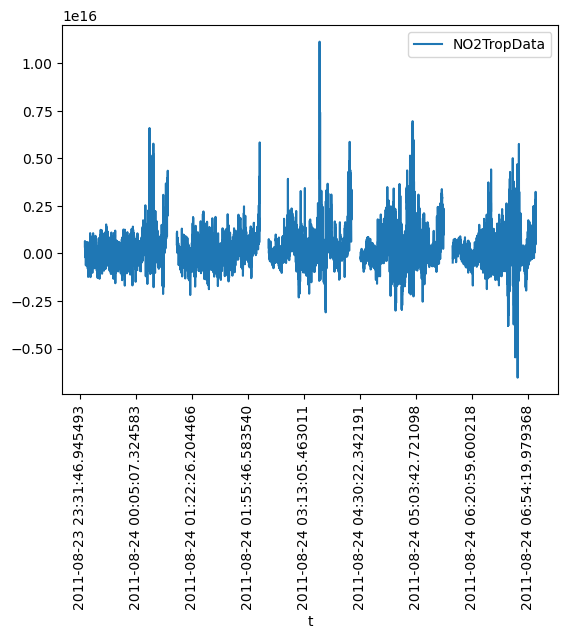

In [51]:
df_omi.plot(x='t', y='NO2TropData')
plt.xticks(rotation=90);

#### Histogram

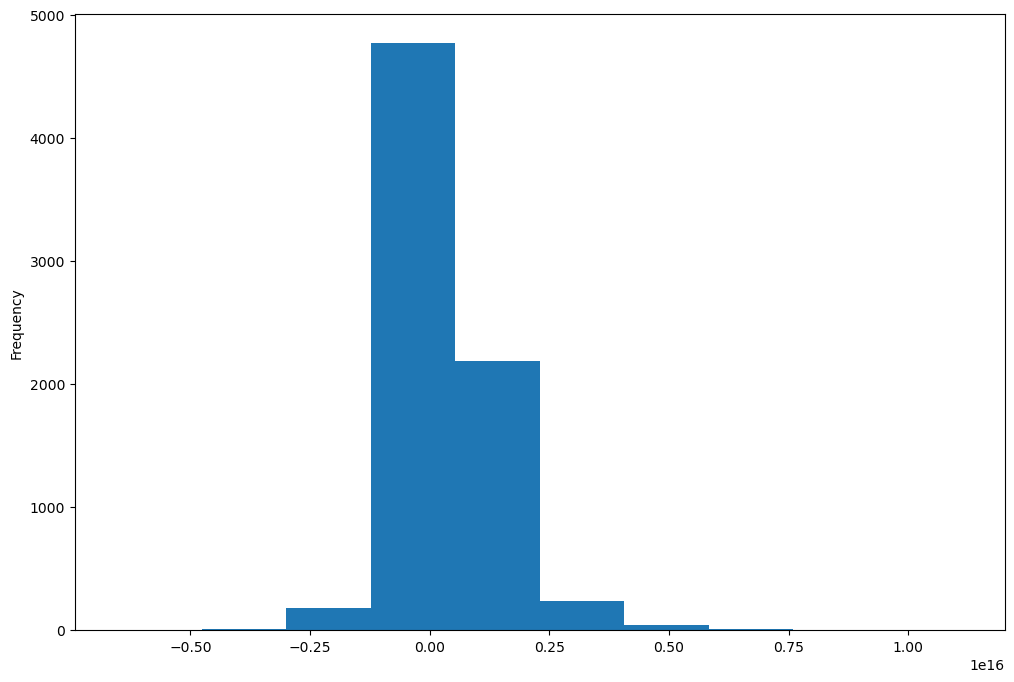

In [52]:
df_omi[field_name].plot(kind='hist', figsize=(12,8));

#### Plot the trajectories

We can plot all the trajectories (swaths):

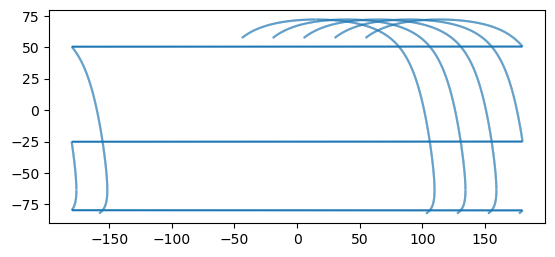

In [53]:
traj_omi.plot();

We can distinguish the trajectories by adding colors:

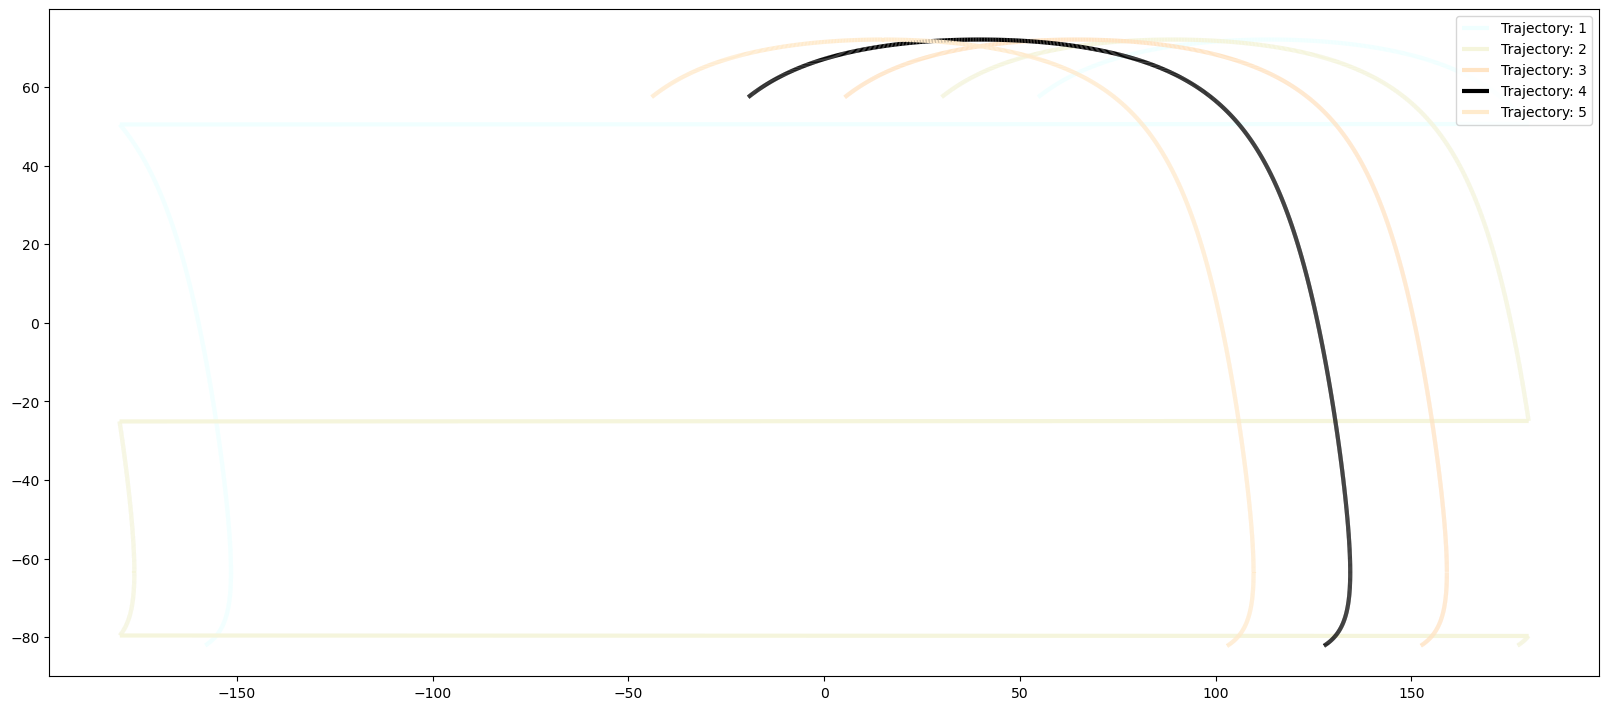

In [54]:
colors = list(mcolors.CSS4_COLORS.keys())

fig, ax = plt.subplots(figsize=(20,15))

for i in range(ntrajs):
    traj_omi.trajectories[i].plot(ax=ax, 
                                  color=colors[i+4], lw=3,
                                  label=f"Trajectory: {i+1}")
plt.legend();

In [55]:
df_omi[df_omi['traj_id']==2].latitude.values

array([-82.13212 , -82.01631 , -81.90051 , ...,  57.65114 ,  57.55052 ,
        57.449745], dtype=float32)

In [56]:
df_omi[df_omi['traj_id']==3].latitude.values

array([-82.16674 , -82.05087 , -81.934975, ...,  57.580154,  57.479343,
        57.378498], dtype=float32)

#### Focus on one trajectory

In [57]:
id_traj = 3
my_traj = traj_omi.trajectories[id_traj]
my_traj

Trajectory 4 (2011-08-24 04:28:02.315641 to 2011-08-24 05:22:48.938398) | Size: 1644 | Length: 22158327.4m
Bounds: (-19.4002685546875, -82.19822692871094, 134.40362548828125, 72.0791244506836)
LINESTRING (127.6970672607422 -82.19822692871094, 127.8781967163086 -82.08240509033203, 128.05383300

We can extract the DataFrame:

In [58]:
my_traj.df

,NO2TropData,traj_id,geometry,1,2,3,4,5
t,,,,,,,,
2011-08-24 04:28:02.315641,NaN,4,POINT (127.69707 -82.19823),4,4,4,4,4
2011-08-24 04:28:04.316038,NaN,4,POINT (127.87820 -82.08241),4,4,4,4,4
2011-08-24 04:28:06.316419,NaN,4,POINT (128.05383 -81.96660),4,4,4,4,4
2011-08-24 04:28:08.316786,NaN,4,POINT (128.22359 -81.85072),4,4,4,4,4
2011-08-24 04:28:10.317167,NaN,4,POINT (128.38818 -81.73473),4,4,4,4,4
...,...,...,...,...,...,...,...,...
2011-08-24 05:22:40.936903,NaN,4,POINT (-18.88350 57.81224),4,4,4,4,4
2011-08-24 05:22:42.937269,NaN,4,POINT (-19.01371 57.71186),4,4,4,4,4
2011-08-24 05:22:44.937650,NaN,4,POINT (-19.14326 57.61138),4,4,4,4,4


We can plot the trajectorory:

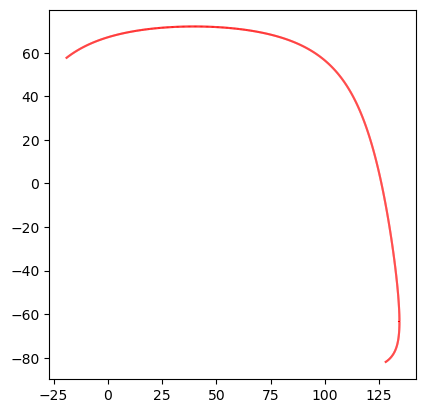

In [59]:
my_traj.plot(color="red");

Consider taking a GeoPandas dataset for mapping the globe:

In [60]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


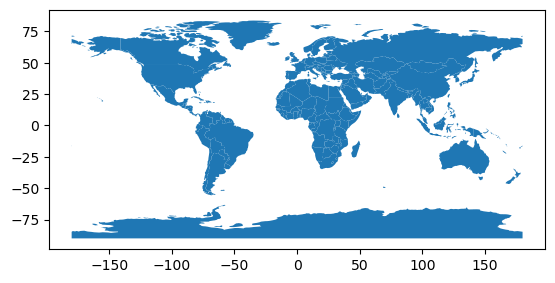

In [61]:
world.plot();

We can use the map of the world as background:

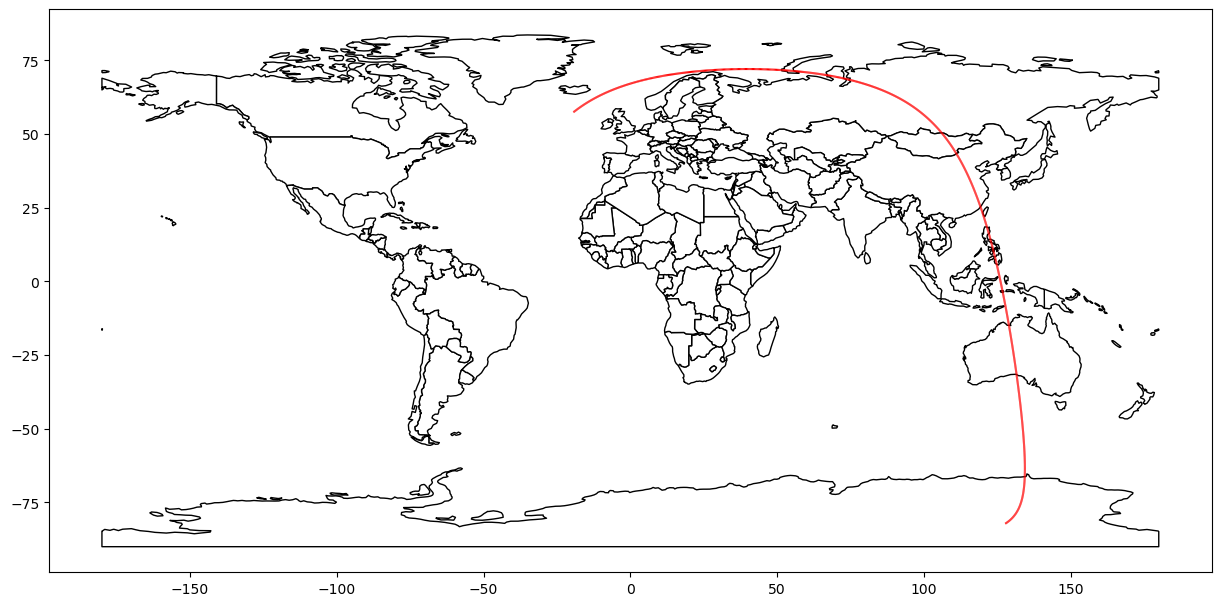

In [62]:
fig, ax = plt.subplots(1, figsize=(15,10))
base = world.plot(ax=ax, color='white', edgecolor='black',)
my_traj.plot(ax=base, color="red");

#### Add field values along the path

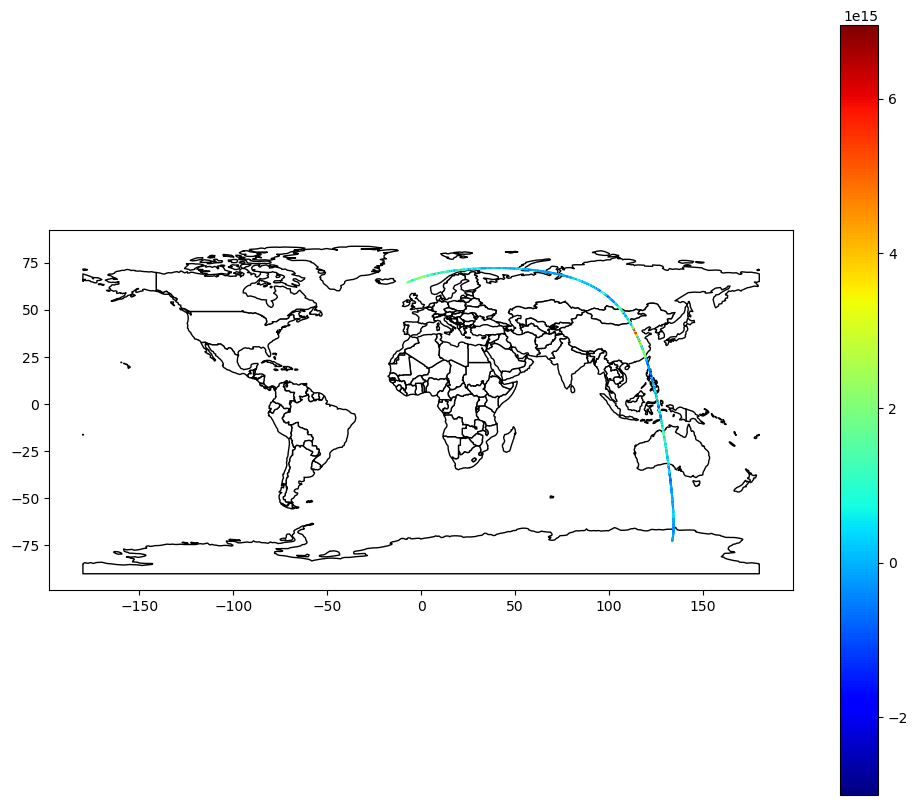

In [63]:
fig, ax = plt.subplots(figsize=(12,10))
base = world.plot(ax=ax, color='white', edgecolor='black',)
my_traj.plot(legend=True, 
             column=field_name, 
             capstyle='round', 
             cmap="jet", ax=base);
#plt.savefig("fig_ColumnAmaountNO2Trop")

#### Create an interactive plot with `hvplot`

In [64]:
my_plot = my_traj.df[field_name].hvplot()
my_plot.opts(xrotation=45)

:Curve   [t]   (NO2TropData)

In [65]:
my_traj.df.hvplot(x="longitude", y="latitude", 
                  c=field_name, 
                  cmap='jet', 
                  tiles=True, 
                  global_extent=True
                 )

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (NO2TropData)